In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [5]:
years = range(2003, 2006)
columns = ["Year", "Month", "DayofMonth", "Cancelled"]
dataframes = (pd.read_csv("../data/{}.csv".format(year), usecols=columns) for year in years)
df = pd.concat(dataframes, ignore_index=False)

In [6]:
df["Date"] = df["Year"].map("{:04d}".format) + "-" + df["Month"].map("{:02d}".format) + "-" + df["DayofMonth"].map("{:02d}".format)
df["Date"] = pd.to_datetime(df["Date"])

df = df.set_index("Date")

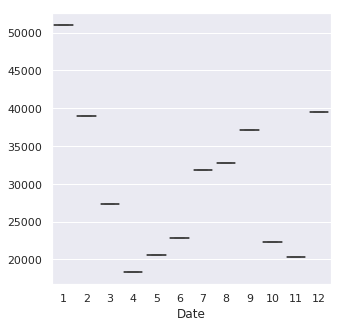

In [35]:
%matplotlib inline
sns.set()

by_month = df.resample("M")["Cancelled"].sum()


cancelled_by_month = by_month.groupby(by_month.index.month).sum()



f, ax = plt.subplots(1, 1, figsize=(5, 5))
sns.boxplot(cancelled_by_month.index, cancelled_by_month.values, ax=ax)